In [1]:
import tensorflow as ts
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Tensorflow is used as backend

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
#check type of the train and test
type(X_train)

numpy.ndarray

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
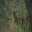

In [5]:
X_train[10]

In [6]:
#check shape of the train and test
#(first is 80% split of data,img size,img size,rbg-->3)
X_train.shape

(50000, 32, 32, 3)

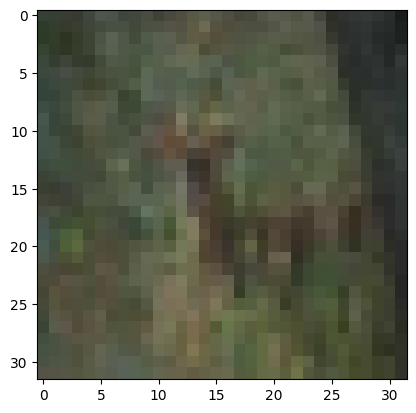

In [7]:
img=plt.imshow(X_train[10])

In [8]:
lab1=y_train[10]
print(lab1)
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

[4]


In [9]:
print('image class is:',classification[y_train[10][0]])

image class is: deer


In [10]:
ytrain_one_hot=to_categorical(y_train)
ytest_one_hot=to_categorical(y_test)

In [11]:
#To normalise
X_train=X_train/255
X_test=X_test/255

In [12]:
#Each column represents rgb percentage colour depth
X_train[8]

array([[[0.5254902 , 0.72941176, 0.8745098 ],
        [0.51372549, 0.72156863, 0.8627451 ],
        [0.50196078, 0.71372549, 0.85490196],
        ...,
        [0.49803922, 0.70980392, 0.87058824],
        [0.49803922, 0.70980392, 0.87058824],
        [0.50196078, 0.71372549, 0.8745098 ]],

       [[0.52156863, 0.74117647, 0.89411765],
        [0.50588235, 0.72941176, 0.87843137],
        [0.50196078, 0.72941176, 0.87843137],
        ...,
        [0.49803922, 0.71764706, 0.87843137],
        [0.49803922, 0.71764706, 0.87843137],
        [0.50196078, 0.72156863, 0.88235294]],

       [[0.50196078, 0.7254902 , 0.88627451],
        [0.49803922, 0.71372549, 0.8745098 ],
        [0.50196078, 0.71372549, 0.8745098 ],
        ...,
        [0.49411765, 0.70980392, 0.87058824],
        [0.49411765, 0.70980392, 0.87058824],
        [0.49411765, 0.70588235, 0.86666667]],

       ...,

       [[0.68235294, 0.81568627, 0.92156863],
        [0.67058824, 0.80784314, 0.89803922],
        [0.60784314, 0

In [13]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

#add Drop
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)              8

In [ ]:
tr=model.fit(X_train,ytrain_one_hot,batch_size=256,epochs=1,validation_split=0.2)

157/157 [==============================] - 42s 262ms/step - loss: 1.8053 - accuracy: 0.3237 - val_loss: 1.4936 - val_accuracy: 0.4495


In [ ]:
model.evaluate(X_test,ytest_one_hot)

In [ ]:
#!pip install scikit-image
from skimage import transform

In [ ]:
dog=plt.imread("/content/dog-puppy-on-garden-royalty-free-image-1586966191.jpg")
plt.imshow(dog)

In [ ]:
resize=transform.resize(dog,(32,32,3))
plt.imshow(resize)

In [ ]:
import numpy as np
prediction=model.predict(np.array([resize]))
print(prediction)

In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)
for i in range(5):
        print(classification[list_index[i]])